<a href="https://colab.research.google.com/github/A-Jouini/Estimating-a-Risk-Factor-Model-for-a-Stock-with-Live-Data/blob/main/Quant_Finance_Project_in_Python_Estimating_a_Risk_Factor_Model_for_a_Stock_with_Live_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimating a Risk Factor Model for a Stock (Live Data)

This notebook estimates a multi-factor risk model (Fama-French style, plus momentum) for a single stock, then adds a few practical diagnostics:
- **Rolling market beta** (time-varying risk)
- **Residual checks** (what the model misses)
- **Variance decomposition** (systematic vs. idiosyncratic)
- **Simple out-of-sample validation**

In [ ]:
import pandas_datareader as dr
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [ ]:
start = '1926-01-01'

In [ ]:
ff = dr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()

/tmp/ipython-input-1012675760.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = dr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()
/tmp/ipython-input-1012675760.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = dr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()


In [ ]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.89 -2.55 -2.39  0.22
 1926-08    2.64 -1.14  3.81  0.25
 1926-09    0.38 -1.36  0.05  0.23
 1926-10   -3.27 -0.14  0.82  0.32
 1926-11    2.54 -0.11 -0.61  0.31
 ...         ...   ...   ...   ...
 2025-08    1.84  3.87  4.42  0.38
 2025-09    3.39 -1.85 -1.05  0.33
 2025-10    1.96 -0.55 -3.09  0.37
 2025-11   -0.13  0.38  3.76  0.30
 2025-12   -0.36 -1.06  2.42  0.34
 
 [1194 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.44  -2.20  -4.58  3.12
 1928   35.56   3.73  -5.26  3.56
 1929  -19.58 -30.68  11.86  4.75
 1930  -31.14  -5.53 -11.76  2.41
 1931  -44.84   3.07 -13.69  1.07
 ...      ...    ...    ...   ...
 2021   23.87  -3.78  25.61  0.04
 2022  -21.32  -7.01  25.68  1.42
 2023   21.75  -3.54 -13.98  4.95
 2024   19.76 -11.34  -8.71  5.26
 2025   13.30 -10.57   8.41  4.25
 
 [99 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [ ]:
ff_df = ff[0]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

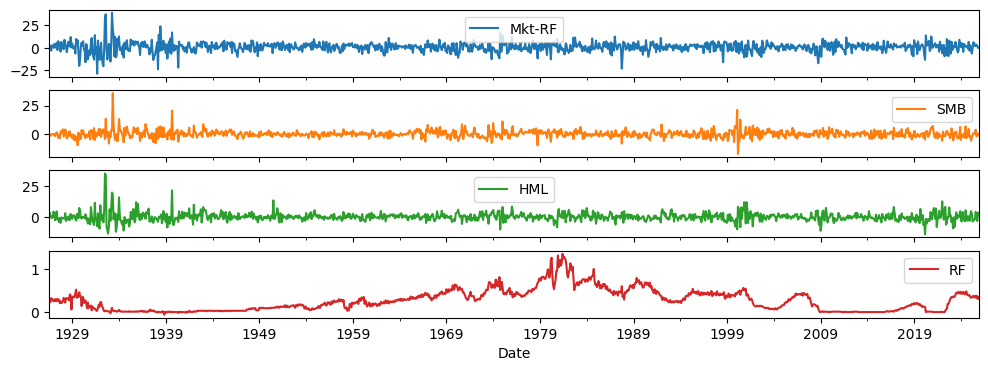

In [ ]:
ff_df.plot(subplots=True,figsize=(12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

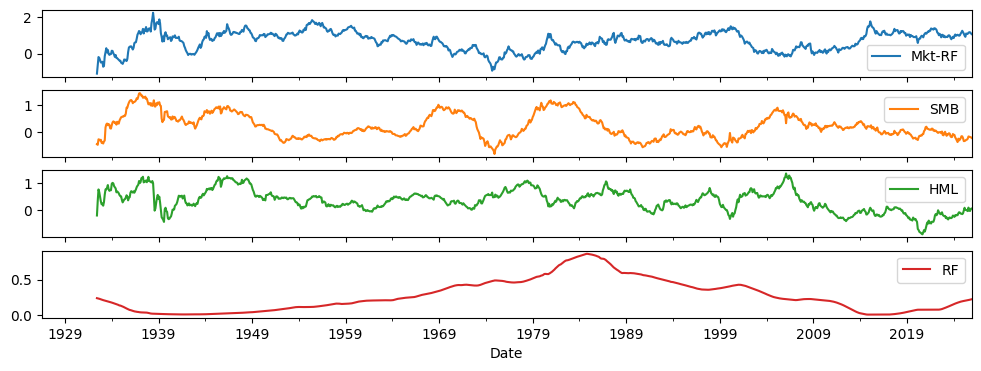

In [ ]:
ff_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

In [ ]:
ff_mom_df = dr.famafrench.FamaFrenchReader('F-F_momentum_Factor',freq='M',start=start).read()[0]

/tmp/ipython-input-326331579.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df = dr.famafrench.FamaFrenchReader('F-F_momentum_Factor',freq='M',start=start).read()[0]
/tmp/ipython-input-326331579.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df = dr.famafrench.FamaFrenchReader('F-F_momentum_Factor',freq='M',start=start).read()[0]


array([<Axes: xlabel='Date'>], dtype=object)

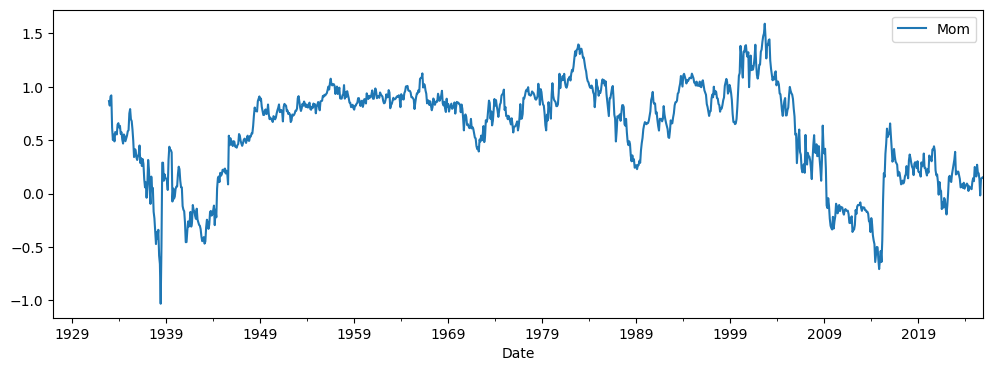

In [ ]:
ff_mom_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

In [ ]:
ffac_merged_df = pd.merge(ff_df,ff_mom_df,how='inner',on='Date',sort=True,copy=True,indicator=False,validate='one_to_one')

In [ ]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.05,-0.32,4.58,0.25,0.57
1927-02,4.17,0.07,2.72,0.26,-1.50
1927-03,0.14,-1.77,-2.38,0.30,3.52
1927-04,0.47,0.39,0.65,0.25,4.36
1927-05,5.45,1.55,4.80,0.30,2.78
...,...,...,...,...,...
2025-08,1.84,3.87,4.42,0.38,-3.54
2025-09,3.39,-1.85,-1.05,0.33,4.63
2025-10,1.96,-0.55,-3.09,0.37,0.27


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
AAPL_df = yf.download('AAPL',start=start)['Close'].resample('ME').ffill().pct_change()

/tmp/ipython-input-699438269.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  AAPL_df = yf.download('AAPL',start=start)['Close'].resample('ME').ffill().pct_change()
[*********************100%***********************]  1 of 1 completed


In [ ]:
ffac_merged_df.index.dtype

period[M]

In [ ]:
AAPL_df.index = AAPL_df.index.strftime('%Y-%m')

In [ ]:
AAPL_df

Ticker,AAPL
Date,
1980-12,NaN
1981-01,-0.172164
1981-02,-0.061943
1981-03,-0.075475
1981-04,0.158163
...,...
2025-10,0.061815
2025-11,0.032364
2025-12,-0.025067


In [ ]:
AAPL_df.index.dtype

dtype('O')

In [ ]:
ffac_merged_df.index = ffac_merged_df.index.strftime('%Y-%m')

In [ ]:
ffac_merged_df.index.dtype

dtype('O')

In [ ]:
AAPL_ffac_merged_df = pd.merge(AAPL_df,ffac_merged_df,how='inner',on='Date',validate='one_to_one',sort=True,indicator=False,copy=True)

In [ ]:
AAPL_ffac_merged_df

,AAPL,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,,
1980-12,NaN,-4.46,-0.28,2.80,1.31,-6.71
1981-01,-0.172164,-5.06,2.91,6.74,1.04,-7.82
1981-02,-0.061943,0.61,-0.47,0.97,1.07,-1.35
1981-03,-0.075475,3.67,3.34,0.61,1.21,0.82
1981-04,0.158163,-2.16,4.50,2.28,1.08,-1.08
...,...,...,...,...,...,...
2025-08,0.119639,1.84,3.87,4.42,0.38,-3.54
2025-09,0.096881,3.39,-1.85,-1.05,0.33,4.63
2025-10,0.061815,1.96,-0.55,-3.09,0.37,0.27


In [ ]:
AAPL_ffac_merged_df['AAPL_RF'] = AAPL_ffac_merged_df['AAPL']*100 - AAPL_ffac_merged_df['RF']

In [ ]:
AAPL_ffac_merged_df.dropna(axis=0,inplace=True)

In [ ]:
AAPL_ffac_merged_df.describe()

,AAPL,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.022475,0.711907,0.021241,0.260074,0.317204,0.455685,1.930324
std,0.125553,4.463607,2.961399,3.125028,0.271319,4.349899,12.578404
min,-0.577436,-23.190000,-17.410000,-13.830000,0.000000,-34.340000,-58.253643
25%,-0.054173,-1.960000,-1.842500,-1.520000,0.070000,-1.215000,-5.618363
50%,0.021753,1.175000,-0.035000,0.055000,0.320000,0.585000,1.986839
75%,0.096917,3.480000,1.685000,1.827500,0.460000,2.740000,9.529946
max,0.453783,13.600000,21.250000,12.860000,1.350000,18.020000,44.838256


In [ ]:
AAPL_ffac_merged_df.head()

,AAPL,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
Date,,,,,,,
1981-01,-0.172164,-5.06,2.91,6.74,1.04,-7.82,-18.256361
1981-02,-0.061943,0.61,-0.47,0.97,1.07,-1.35,-7.264295
1981-03,-0.075475,3.67,3.34,0.61,1.21,0.82,-8.757489
1981-04,0.158163,-2.16,4.50,2.28,1.08,-1.08,14.736265
1981-05,0.167398,0.13,1.94,-0.43,1.15,3.56,15.589776


In [ ]:
from statsmodels.api import OLS

In [ ]:
import statsmodels.tools


In [ ]:
AAPL_ffac_merged_df_c = statsmodels.tools.add_constant(AAPL_ffac_merged_df,prepend=True)

In [ ]:
results = OLS(AAPL_ffac_merged_df_c['AAPL_RF'],AAPL_ffac_merged_df_c[['const','Mkt-RF','SMB','HML','Mom']],missing='drop').fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     52.56
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           2.39e-37
Time:                        15:48:52   Log-Likelihood:                -2043.5
No. Observations:                 540   AIC:                             4097.
Df Residuals:                     535   BIC:                             4118.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3580      0.477      2.850      0.005       0.422       2.294
Mkt-RF         1.1845      0.111     10.639      0.000       0.966       1.403
SMB            0.2408      0.162      1.490      0.137      -0.077       0.558
HML           -0.8556      0.158     -5.430      0.000      -1.165      -0.546
Mom           -0.1176      0.112     -1.046      0.296      -0.338       0.103
==============================================================================
Omnibus:                       17.524   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.129
Skew:                          -0.042   Prob(JB):                     3.19e-09
Kurtosis:                       4.316   Cond. No.                         5.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Rolling Market Beta (time-varying)

Even if factor loadings are stable on average, *market sensitivity* often changes across regimes. A light-weight proxy is a rolling CAPM beta:
\[
\beta_t = \frac{\text{Cov}(r_i - r_f, r_m - r_f)}{\text{Var}(r_m - r_f)}
\]

In [ ]:
# Rolling CAPM beta using monthly data (36-month window)
window = 36
excess = AAPL_ffac_merged_df["AAPL_RF"]
mkt_excess = AAPL_ffac_merged_df["Mkt-RF"]

rolling_beta = excess.rolling(window).cov(mkt_excess) / mkt_excess.rolling(window).var()
rolling_beta.dropna().plot(title=f"Rolling Market Beta (window={window} months)")

## Residual Diagnostics (quick checks)

Residuals represent **idiosyncratic** returns not explained by the factor model. A few cheap checks:
- mean / volatility
- autocorrelation (if strong, the model is missing structure)

In [ ]:
resid = results.resid.dropna()

diag = pd.Series(
    {
        "Residual mean": resid.mean(),
        "Residual std": resid.std(),
        "Lag-1 autocorr": resid.autocorr(lag=1),
        "Lag-3 autocorr": resid.autocorr(lag=3),
        "Lag-12 autocorr": resid.autocorr(lag=12),
    }
)
diag

## Systematic vs. Idiosyncratic Variance

A practical decomposition (on the sample):
- **Systematic** ≈ variance of fitted values
- **Idiosyncratic** ≈ variance of residuals

In [ ]:
fitted = results.fittedvalues.reindex(resid.index)
systematic_var = fitted.var()
idiosyncratic_var = resid.var()
total_var = systematic_var + idiosyncratic_var

pd.DataFrame(
    {
        "Variance": [systematic_var, idiosyncratic_var, total_var],
        "Share": [systematic_var / total_var, idiosyncratic_var / total_var, 1.0],
    },
    index=["Systematic (fitted)", "Idiosyncratic (resid)", "Total (approx)"],
)

## Out-of-Sample Validation (simple)

Fit on the first 80% of the time series and evaluate on the last 20%.
This is not a trading strategy—just a basic generalization check.

In [ ]:
from sklearn.metrics import r2_score

df = AAPL_ffac_merged_df_c.dropna().copy()

y = df["AAPL_RF"]
X = df[["const","Mkt-RF","SMB","HML","Mom"]]

split = int(len(df) * 0.8)
y_train, y_test = y.iloc[:split], y.iloc[split:]
X_train, X_test = X.iloc[:split], X.iloc[split:]

oos_results = OLS(y_train, X_train).fit()
y_pred = oos_results.predict(X_test)

pd.Series(
    {
        "In-sample R²": oos_results.rsquared,
        "Out-of-sample R² (test)": r2_score(y_test, y_pred),
        "Test corr(y, y_hat)": pd.Series(y_test).corr(pd.Series(y_pred)),
    }
)